# Heart Disease Detection

Performing some Exploratory Data Analysis to get a better understanding of the data. Then we will create different classification methods to detect patients with a high risk of having heart disease. In the end, we will compare the performance of the models that we made to choose the best one.

The Classification methods used are - **Decision Tree (CART, CHAID)**, **Logistic Regression**, **LSVM**, **Ada Boost**, **Gradient Boost** and **XG Boost**.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#formatting dataframe to 2 decimal precision
pd.options.display.float_format = "{:,.2f}".format

## Exploratory Data Analysis

In [3]:
df = pd.read_csv("heart.csv")
df.head(9)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.40,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.30,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.50,2,0,3,1


In [4]:
print(df.shape)
df.describe()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Checking the data types:

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Now let's check if there is any missing value:

In [6]:
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Correlation Matrix -

It gives pair wise relationship between variables.

In [7]:
import seaborn as sns
sns.set()
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


It seems that "cp", "thalach", "slope" and "restepg" have more correlation with target value. but as we see in the matrix, "thalach" and "slope" have a considerable correlation with each other,  and we see the same thing for "cp", and "thalach" so probaely we should be careful about multicolinearity. 

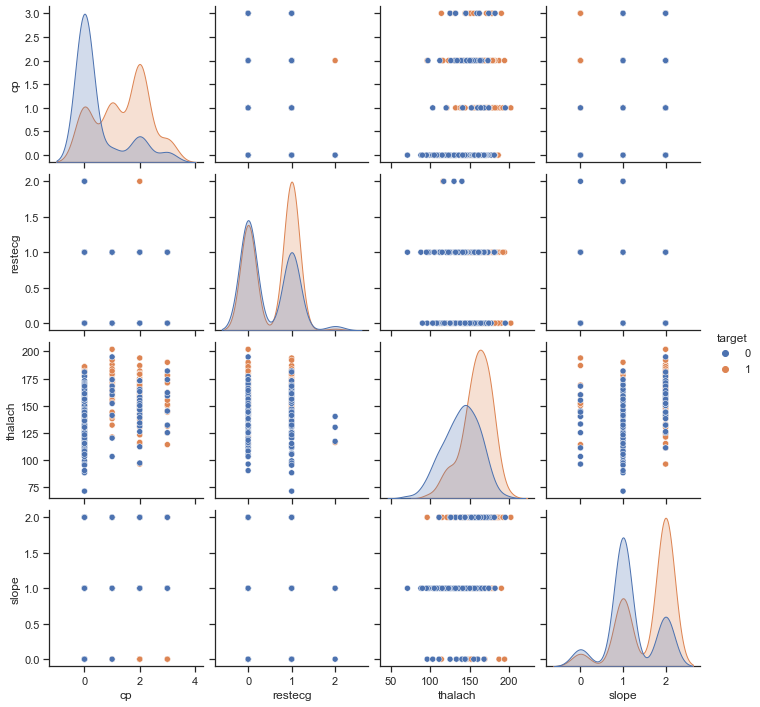

In [8]:
df_subset = df[["target","cp", "restecg", "thalach", "slope"]]

sns.set_theme(style="ticks")
sns.pairplot(df_subset, hue="target")

As we see in the pair plot, the four features have different distributions for each target class.

#### Distributions of each variable:

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

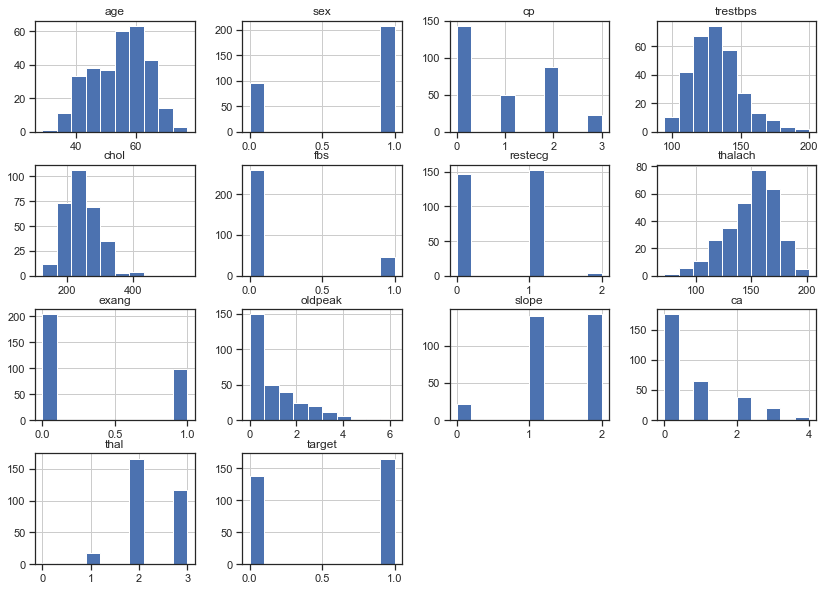

In [9]:
df.hist(figsize = (14,10))

## Decision Tree - CART

In [10]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
DTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
Tree_yhat = DTree.predict(X_test)
Tree_yhat[0:10]

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

#### Decision Tree CART Evaluation -

In [21]:
from sklearn import metrics
global acc_dt 
DTree_Score = metrics.accuracy_score(y_test, Tree_yhat) 
acc_dt = DTree_Score 
print("Train set Accuracy: ", round((100 * metrics.accuracy_score(y_train, DTree.predict(X_train))),2))
print("DecisionTrees's Accuracy: ", round(100 * DTree_Score, 2))

Train set Accuracy:  86.78
DecisionTrees's Accuracy:  85.25


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
# 1.Confusiom Matrix.
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33  3]
 [ 6 19]]


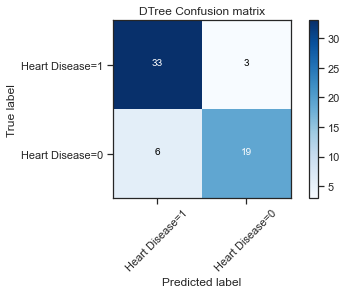

In [23]:
# Compute confusion matrix
DTree_cnf_matrix = confusion_matrix(y_test, Tree_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(DTree_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='DTree Confusion matrix')

In [24]:
from sklearn.metrics import recall_score, f1_score
print (classification_report(y_test, Tree_yhat))
DTree_Recall = recall_score(y_test, Tree_yhat)
DTree_F1Score = f1_score(y_test, Tree_yhat)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



## Logistic Regression

In [25]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [28]:
LR_yhat = LR.predict(X_test)
LR_yhat[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [29]:
LR_yhat_prob = LR.predict_proba(X_test)
LR_yhat_prob[0:5]

array([[0.24, 0.76],
       [0.69, 0.31],
       [0.39, 0.61],
       [0.12, 0.88],
       [0.36, 0.64]])

#### Logistic Regression Evaluation -

In [30]:
from sklearn import metrics
global acc_lr
LR_Score = metrics.accuracy_score(y_test, LR_yhat) 
acc_lr = LR_Score
print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, LR.predict(X_train)),2))
print("Logistic Regression's Accuracy: ", round(100 * LR_Score, 2))

Train set Accuracy:  76.45
Logistic Regression's Accuracy:  81.97


Confusion matrix, without normalization
[[34  2]
 [ 9 16]]


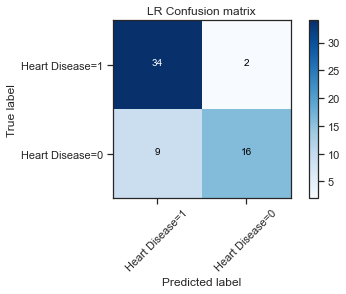

In [31]:
# Compute confusion matrix
LR_cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(LR_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='LR Confusion matrix')

In [32]:
print (classification_report(y_test, LR_yhat))
LR_Recall = recall_score(y_test, LR_yhat)
LR_F1Score = f1_score(y_test, LR_yhat)

              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.79      0.94      0.86        36

    accuracy                           0.82        61
   macro avg       0.84      0.79      0.80        61
weighted avg       0.83      0.82      0.81        61



## LSVM

In [33]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [35]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train) 

SVC(kernel='linear')

In [36]:
SVM_yhat = SVM.predict(X_test)
SVM_yhat [0:5]

array([1, 0, 1, 1, 1], dtype=int64)

#### SVM Evaluation -

In [37]:
from sklearn import metrics
global acc_svm
SVM_Score = metrics.accuracy_score(y_test, SVM_yhat)
acc_svm = SVM_Score
print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, SVM.predict(X_train)),2))
print("SVM's Accuracy: ", round(100*SVM_Score, 2))

Train set Accuracy:  86.36
SVM's Accuracy:  91.8


Confusion matrix, without normalization
[[34  2]
 [ 3 22]]


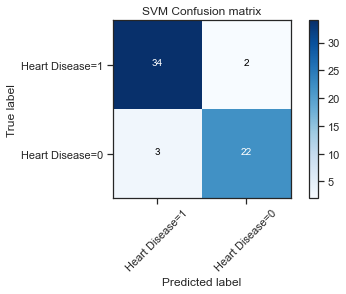

In [38]:
# Compute confusion matrix
SVM_cnf_matrix = confusion_matrix(y_test, SVM_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(SVM_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='SVM Confusion matrix')

In [39]:
print (classification_report(y_test, SVM_yhat))
SVM_Recall = recall_score(y_test, SVM_yhat)
SVM_F1Score = f1_score(y_test, SVM_yhat)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



## Decision Tree - CHAID

In [40]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [42]:
#pip install chefboost

In [43]:
from chefboost import Chefboost as chef
config = {'algorithm': 'CHAID'}
global model2
model = chef.fit(df, config = config, target_label = 'target')
model2 = model

[INFO]:  1 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  22.309483289718628  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.052255225522552254
MSE:  0.029427942794279432
RMSE:  0.17154574548580165
RAE:  0.23246592016982628
RRSE:  0.3444617984776431
Mean:  0.5445544554455446
MAE / Mean:  9.595959595959595 %
RMSE / Mean:  31.502036898301753 %


In [44]:
model

{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\Sai Teja\\Desktop\\Heart Disease Classification\\outputs/rules/rules.py'>],
 'alphas': [],
 'config': {'algorithm': 'Regression',
  'enableRandomForest': False,
  'num_of_trees': 5,
  'enableMultitasking': False,
  'enableGBM': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'enableAdaboost': False,
  'num_of_weak_classifier': 4,
  'enableParallelism': True,
  'num_cores': 1},
 'nan_values': [['age', None],
  ['sex', None],
  ['cp', None],
  ['trestbps', None],
  ['chol', None],
  ['fbs', None],
  ['restecg', None],
  ['thalach', None],
  ['exang', None],
  ['oldpeak', None],
  ['slope', None],
  ['ca', None],
  ['thal', None],
  ['Decision', None]]}

In [45]:
#Prediction for Single instance
test_ins = df.loc[300]
prediction = chef.predict(model, param = test_ins)
print("Decision:",prediction)

Decision: 0


In [46]:
#Prediction for Single instance
test_ins = df.loc[45]
prediction = chef.predict(model, param = test_ins)
print("Decision:",prediction)

Decision: 1


In [47]:
#Predcition for Complete Test dataset.
l = X_test.tolist()
chaid_yhat = []
for i in range(len(l)):
    pred = chef.predict(model, param = l[i])
    if pred >= 0.5:
        chaid_yhat.append(1)
    elif pred < 0.5:
        chaid_yhat.append(0)
    
  
chaid_yhat[0:20]


[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

##### Comparing prediction with y_test:

In [48]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

#### Decision Tree CHAID Evaluation -

In [49]:
from sklearn import metrics

#Training Score Evaluation
p = X_train.tolist()
chaid_xhat = []
for i in range(len(p)):
    pred = chef.predict(model, param = p[i])
    if pred >= 0.5:
        chaid_xhat.append(1)
    elif pred < 0.5:
        chaid_xhat.append(0)

rf_Score = metrics.accuracy_score(y_test, chaid_yhat)
global acc_chaid
acc_chaid = rf_Score

print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, chaid_xhat,2)))
print("CHAID Accuracy: ", round(100*rf_Score, 2))

Train set Accuracy:  97
CHAID Accuracy:  91.8


C:\Users\Sai Teja\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Confusion matrix, without normalization
[[33  2]
 [ 3 23]]


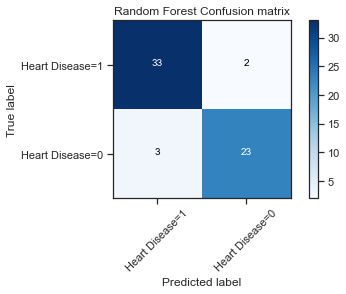

In [50]:
# Compute confusion matrix
rf_cnf_matrix = confusion_matrix(y_test, chaid_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='Random Forest Confusion matrix')

In [51]:
print (classification_report(y_test, chaid_yhat))
rf_Recall = recall_score(y_test, chaid_yhat)
rf_F1Score = f1_score(y_test, chaid_yhat)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.92      0.94      0.93        35

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.92        61
weighted avg       0.92      0.92      0.92        61



## Ada Boost

In [52]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [54]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X, y)

AdaBoostClassifier(random_state=0)

In [55]:
ada_yhat = ada.predict(X_test)
ada_yhat [0:5]

array([1, 0, 1, 1, 0], dtype=int64)

#### Ada Boost Evaluation -

In [56]:
from sklearn import metrics
global acc_ada
ada_Score = metrics.accuracy_score(y_test, ada_yhat)
acc_ada = ada_Score
print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, ada.predict(X_train)),2))
print("Ada Boost's Accuracy: ", round(100*ada_Score, 2))

Train set Accuracy:  91.32
Ada Boost's Accuracy:  93.44


Confusion matrix, without normalization
[[33  3]
 [ 1 24]]


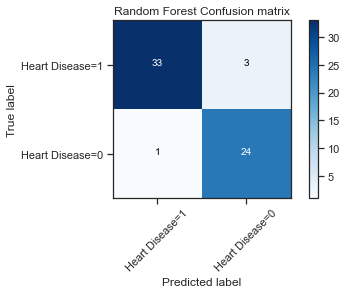

In [57]:
# Compute confusion matrix
ada_cnf_matrix = confusion_matrix(y_test, ada_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(ada_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='Random Forest Confusion matrix')

In [58]:
print (classification_report(y_test, ada_yhat))
ada_Recall = recall_score(y_test, ada_yhat)
ada_F1Score = f1_score(y_test, ada_yhat)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.97      0.92      0.94        36

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



## Gradient Boost

In [59]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [62]:
grad_yhat = grad.predict(X_test)
grad_yhat [0:5]

array([0, 1, 1, 1, 0], dtype=int64)

#### Gradient Boost Evaluation -

In [63]:
from sklearn import metrics
global acc_gb
grad_Score = metrics.accuracy_score(y_test, grad_yhat)
acc_gb = grad_Score
print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, grad.predict(X_train)),2))
print("Gradient Boost's Accuracy: ", round(100*grad_Score, 2))

Train set Accuracy:  93.39
Gradient Boost's Accuracy:  81.97


Confusion matrix, without normalization
[[33  3]
 [ 1 24]]


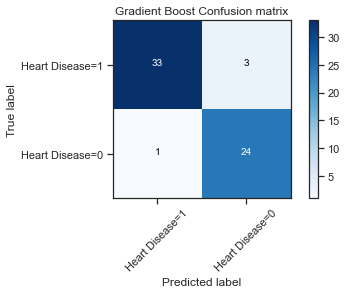

In [64]:
# Compute confusion matrix
grad_cnf_matrix = confusion_matrix(y_test, ada_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(grad_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='Gradient Boost Confusion matrix')

In [65]:
print (classification_report(y_test, grad_yhat))
grad_Recall = recall_score(y_test, grad_yhat)
grad_F1Score = f1_score(y_test, grad_yhat)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



## XG Boost

In [66]:
X=df.drop('target',axis=1).values    
y=df['target'].values

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [68]:
#!pip install xgboost

In [69]:
import xgboost as xgb

In [70]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [71]:
xg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [72]:
xg.fit(X_train,y_train)

[13:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sai Teja\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1,
              objective='reg:linear', predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
xg_yhat = xg.predict(X_test)
xg_yhat [0:5]

array([1, 0, 1, 1, 0], dtype=int64)

#### XG Boost Evaluation - 

In [74]:
from sklearn import metrics
global acc_dt
xg_Score = metrics.accuracy_score(y_test, xg_yhat)
acc_dt = xg_Score
print("Train set Accuracy: ", round(100*metrics.accuracy_score(y_train, xg.predict(X_train)),2))
print("XG Boost's Accuracy: ", round(100*xg_Score, 2))

Train set Accuracy:  85.54
XG Boost's Accuracy:  85.25


Confusion matrix, without normalization
[[34  2]
 [ 7 18]]


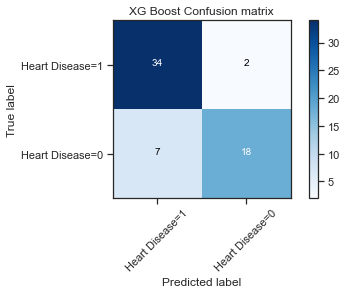

In [75]:
# Compute confusion matrix
xg_cnf_matrix = confusion_matrix(y_test, xg_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(xg_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='XG Boost Confusion matrix')

In [76]:
print (classification_report(y_test,xg_yhat))
xg_Recall = recall_score(y_test, xg_yhat)
xg_F1Score = f1_score(y_test, xg_yhat)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



## Comparing Classification Methods

In [77]:
pd.options.display.float_format = "{:,.2f}".format

Scores_Comparison = {'Methods': ['Decision Tree', 'Logistic Regression', 'SVM', 'CHAID', 'Ada Boost', 'Gradient Boost', 'XG Boost'],
                     'Accuracy': [ DTree_Score, LR_Score, SVM_Score, rf_Score, ada_Score, grad_Score, xg_Score] ,
                     'Recall': [ DTree_Recall, LR_Recall, SVM_Recall, rf_Recall, ada_Recall, grad_Recall, xg_Recall],
                     'F1-Score': [ DTree_F1Score, LR_F1Score, SVM_F1Score, rf_F1Score, ada_F1Score, grad_F1Score, xg_F1Score]
                    }
Scores_Comparison = pd.DataFrame(data=Scores_Comparison)
#Scores_Comparison.sort_values(by='Recall', ascending=False)
Scores_Comparison

,Methods,Accuracy,Recall,F1-Score
0,Decision Tree,0.85,0.92,0.88
1,Logistic Regression,0.82,0.94,0.86
2,SVM,0.92,0.94,0.93
3,CHAID,0.92,0.94,0.93
4,Ada Boost,0.93,0.92,0.94
5,Gradient Boost,0.82,0.86,0.85
6,XG Boost,0.85,0.94,0.88


<AxesSubplot:>

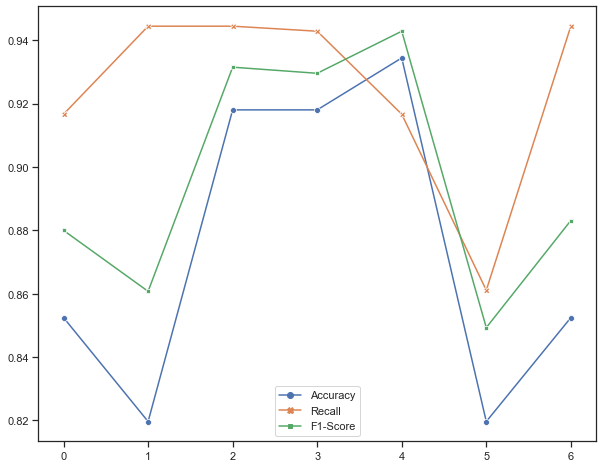

In [78]:
from matplotlib.pyplot import figure, rcParams
rcParams['figure.figsize'] = 10,8
sns.set_theme(style="ticks")
sns.lineplot(data=Scores_Comparison, markers=True, dashes=False)

## User Interface - 

In [89]:
import tkinter as tk
from tkinter import ttk
win = tk.Tk()
win.title('Heat Disease Prediction')
win.geometry('650x320')

#Column 1 
age=ttk.Label(win,text="age")
age.grid(row=0,column=0,sticky=tk.W)
age_var=tk.StringVar()
age_entrybox=ttk.Entry(win,width=16,textvariable=age_var)
age_entrybox.grid(row=0,column=1)
#Column 2
sex=ttk.Label(win,text="sex")
sex.grid(row=1,column=0,sticky=tk.W)
sex_var=tk.StringVar()
sex_entrybox=ttk.Entry(win,width=16,textvariable=sex_var)
sex_entrybox.grid(row=1,column=1)
#Column 3
cp=ttk.Label(win,text="cp")
cp.grid(row=2,column=0,sticky=tk.W)
cp_var=tk.StringVar()
cp_entrybox=ttk.Entry(win,width=16,textvariable=cp_var)
cp_entrybox.grid(row=2,column=1)
#Column 4
trestbps=ttk.Label(win,text="trestbps")
trestbps.grid(row=3,column=0,sticky=tk.W)
trestbps_var=tk.StringVar()
trestbps_entrybox=ttk.Entry(win,width=16,textvariable=trestbps_var)
trestbps_entrybox.grid(row=3,column=1)
#Column 5
chol=ttk.Label(win,text="chol")
chol.grid(row=4,column=0,sticky=tk.W)
chol_var=tk.StringVar()
chol_entrybox=ttk.Entry(win,width=16,textvariable=chol_var)
chol_entrybox.grid(row=4,column=1)
#Column 6
fbs=ttk.Label(win,text="fbs")
fbs.grid(row=5,column=0,sticky=tk.W)
fbs_var=tk.StringVar()
fbs_entrybox=ttk.Entry(win,width=16,textvariable=fbs_var)
fbs_entrybox.grid(row=5,column=1)
#Column 7
restecg=ttk.Label(win,text="restecg")
restecg.grid(row=6,column=0,sticky=tk.W)
restecg_var=tk.StringVar()
restecg_entrybox=ttk.Entry(win,width=16,textvariable=restecg_var)
restecg_entrybox.grid(row=6,column=1)
#Column 8
thalach=ttk.Label(win,text="talach")
thalach.grid(row=7,column=0,sticky=tk.W)
thalach_var=tk.StringVar()
thalach_entrybox=ttk.Entry(win,width=16,textvariable=thalach_var)
thalach_entrybox.grid(row=7,column=1)
#Column 9
exang=ttk.Label(win,text="exang")
exang.grid(row=8,column=0,sticky=tk.W)
exang_var=tk.StringVar()
exang_entrybox=ttk.Entry(win,width=16,textvariable=exang_var)
exang_entrybox.grid(row=8,column=1)
#Column 10
oldpeak=ttk.Label(win,text="oldpeak")
oldpeak.grid(row=9,column=0,sticky=tk.W)
oldpeak_var=tk.StringVar()
oldpeak_entrybox=ttk.Entry(win,width=16,textvariable=oldpeak_var)
oldpeak_entrybox.grid(row=9,column=1)
#Column 11
slope=ttk.Label(win,text="slope")
slope.grid(row=10,column=0,sticky=tk.W)
slope_var=tk.StringVar()
slope_entrybox=ttk.Entry(win,width=16,textvariable=slope_var)
slope_entrybox.grid(row=10,column=1)
#Column 12
ca=ttk.Label(win,text="ca")
ca.grid(row=11,column=0,sticky=tk.W)
ca_var=tk.StringVar()
ca_entrybox=ttk.Entry(win,width=16,textvariable=ca_var)
ca_entrybox.grid(row=11,column=1)
#Column 13
thal=ttk.Label(win,text="thal")
thal.grid(row=12,column=0,sticky=tk.W)
thal_var=tk.StringVar()
thal_entrybox=ttk.Entry(win,width=16,textvariable=thal_var)
thal_entrybox.grid(row=12,column=1)

PRED = DT=ttk.Label(win,text="Prediction")
DT.grid(row=0,column=5,sticky=tk.W)

ACC = ttk.Label(win,text="Accuracy")
ACC.grid(row=0,column=9,sticky=tk.W)

DT=ttk.Label(win,text="Decision Tree")
DT.grid(row=1,column=4,sticky=tk.W)
DT_var1=tk.StringVar()
DT_var2=tk.StringVar()
DT_out=ttk.Entry(win,width=12,textvariable=DT_var1)
DT_out.grid(row=1,column=5)
DT_acc=ttk.Entry(win,width=12,textvariable=DT_var2)
DT_acc.grid(row=1,column=9)


LRG=ttk.Label(win,text="Logistic Regression")
LRG.grid(row=2,column=4,sticky=tk.W)
LRG_var1=tk.StringVar()
LRG_var2=tk.StringVar()
LRG_out=ttk.Entry(win,width=12,textvariable=LRG_var1)
LRG_out.grid(row=2,column=5)
LRG_acc=ttk.Entry(win,width=12,textvariable=LRG_var2)
LRG_acc.grid(row=2,column=9)

SVm=ttk.Label(win,text="LSVM")
SVm.grid(row=3,column=4,sticky=tk.W)
SVm_var1=tk.StringVar()
SVm_var2=tk.StringVar()
SVm_out=ttk.Entry(win,width=12,textvariable=SVm_var1)
SVm_out.grid(row=3,column=5)
SVm_acc=ttk.Entry(win,width=12,textvariable=SVm_var2)
SVm_acc.grid(row=3,column=9)

CHAID=ttk.Label(win,text="CHAID")
CHAID.grid(row=4,column=4,sticky=tk.W)
CHAID_var1=tk.StringVar()
CHAID_var2=tk.StringVar()
CHAID_out=ttk.Entry(win,width=12,textvariable=CHAID_var1)
CHAID_out.grid(row=4,column=5)
CHAID_acc=ttk.Entry(win,width=12,textvariable=CHAID_var2)
CHAID_acc.grid(row=4,column=9)

ADA=ttk.Label(win,text="Ada Boost")
ADA.grid(row=5,column=4,sticky=tk.W)
ADA_var1=tk.StringVar()
ADA_var2=tk.StringVar()
ADA_out=ttk.Entry(win,width=12,textvariable=ADA_var1)
ADA_out.grid(row=5,column=5)
ADA_acc=ttk.Entry(win,width=12,textvariable=ADA_var2)
ADA_acc.grid(row=5,column=9)

GB=ttk.Label(win,text="Gradient Boost")
GB.grid(row=6,column=4,sticky=tk.W)
GB_var1=tk.StringVar()
GB_var2=tk.StringVar()
GB_out=ttk.Entry(win,width=12,textvariable=GB_var1)
GB_out.grid(row=6,column=5)
GB_acc=ttk.Entry(win,width=12,textvariable=GB_var2)
GB_acc.grid(row=6,column=9)

XG=ttk.Label(win,text="XG Boost")
XG.grid(row=7,column=4,sticky=tk.W)
XG_var1=tk.StringVar()
XG_var2=tk.StringVar()
XG_out=ttk.Entry(win,width=12,textvariable=XG_var1)
XG_out.grid(row=7,column=5)
XG_acc=ttk.Entry(win,width=12,textvariable=XG_var2)
XG_acc.grid(row=7,column=9)


def Read():
    AGE=age_var.get()
    #DF.loc[0,'age']=AGE
                      
    SEX=sex_var.get()
    #DF.loc[0,'sex']=sex
                      
    CP=cp_var.get()
    #DF.loc[0,'cp']=CP
                      
    TRESTBPS=trestbps_var.get()
    #DF.loc[0,'trestbps']=TRESTBPS
                      
    CHOL=chol_var.get()
    #DF.loc[0,'chol']=CHOL
                      
    FBS=fbs_var.get()
    #DF.loc[0,'fbs']=FBS
                      
    RESTECG=restecg_var.get()
    #DF.loc[0,'restecg']=RESTECG
                      
    THALACH=thalach_var.get()
    #DF.loc[0,'thalach']=THALACH
                      
    EXANG=exang_var.get()
    #DF.loc[0,'exang']=EXANG
    
    OLDPEAK=oldpeak_var.get()
    #DF.loc[0,'oldpeak']=OLDPEAK
                      
    SLOPE=slope_var.get()
    #DF.loc[0,'slope']=SLOPE
                      
    CA=ca_var.get()
    #DF.loc[0,'ca']=CA
                      
    THAL=thal_var.get()
    #DF.loc[0,'thal']=THAL
    print("INPUT:", AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL)
    
    test_list = [AGE, SEX, CP, TRESTBPS, CHOL, FBS, RESTECG, THALACH, EXANG, OLDPEAK, SLOPE, CA, THAL]
    test_instance = np.array(test_list, ndmin=2) 
    test_instance2 = np.array(test_list, dtype = 'f') 
    test_instance3 = np.array(test_list, dtype = 'f', ndmin = 2)
    
    print(str(DTree.predict(test_instance)[0]))
    print(str(LR.predict(test_instance3)[0]))
    print(str(SVM.predict(test_instance)[0]))
    print(str(chef.predict(model2, param = test_instance2)))
    print(str(ada.predict(test_instance)[0]))
    print(str(grad.predict(test_instance)[0]))
    print(str(xg.predict(test_instance3)[0]))
    
    a.set(tr(DTree.predict(test_instance)[0]))
    b.set(str(LR.predict(test_instance3)[0]))
    c.set(str(SVM.predict(test_instance)[0]))
    d.set(str(chef.predict(model2, param = test_instance2)))
    e.set(str(ada.predict(test_instance)[0]))
    f.set(str(grad.predict(test_instance)[0]))
    g.set(str(xg.predict(test_instance3)[0]))
    
    
    #return a,b,c,d,e,f,g

result = ""
enter_btn = ttk.Button(win, text="Enter",command=Read)
enter_btn.grid(row=30 ,column=1 )

a = ""
DT_out.insert(1,a)

Predict_entrybox=ttk.Entry(win,width=24)
Predict_entrybox.grid(row=30,column=6)
Predict_entrybox.insert(1,str(result))
Predict_label=ttk.Label(win,text="Prediction")
Predict_label.grid(row=30,column=5)
win.mainloop()

INPUT: 41 1 0 110 172 0 0 158 0 0 2 0 3
0
1
1
0
0
0
1


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sai Teja\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SAITEJ~1\AppData\Local\Temp/ipykernel_7380/4169165475.py", line 211, in Read
    a.set(tr(DTree.predict(test_instance)[0]))
AttributeError: 'str' object has no attribute 'set'


INPUT: 41 1 0 110 172 0 0 158 0 0 2 0 3
0
1
1
0
0
0
1


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sai Teja\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SAITEJ~1\AppData\Local\Temp/ipykernel_7380/4169165475.py", line 211, in Read
    a.set(tr(DTree.predict(test_instance)[0]))
AttributeError: 'str' object has no attribute 'set'


INPUT: 41 1 0 110 172 0 0 158 0 0 2 0 3
0
1
1
0
0
0
1
INPUT: 41 1 0 110 172 0 0 158 0 0 2 0 3
0
1
1
0
0
0
1


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sai Teja\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SAITEJ~1\AppData\Local\Temp/ipykernel_7380/4169165475.py", line 211, in Read
    a.set(tr(DTree.predict(test_instance)[0]))
AttributeError: 'str' object has no attribute 'set'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sai Teja\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SAITEJ~1\AppData\Local\Temp/ipykernel_7380/4169165475.py", line 211, in Read
    a.set(tr(DTree.predict(test_instance)[0]))
AttributeError: 'str' object has no attribute 'set'


INPUT: 41 1 0 110 172 0 0 158 0 0 2 0 3
0
1
1
0
0
0
1


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Sai Teja\anaconda3\envs\tf\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\SAITEJ~1\AppData\Local\Temp/ipykernel_7380/4169165475.py", line 211, in Read
    a.set(tr(DTree.predict(test_instance)[0]))
AttributeError: 'str' object has no attribute 'set'
